In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/canser/Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[103   4]
 [  5  59]]


0.9473684210526315

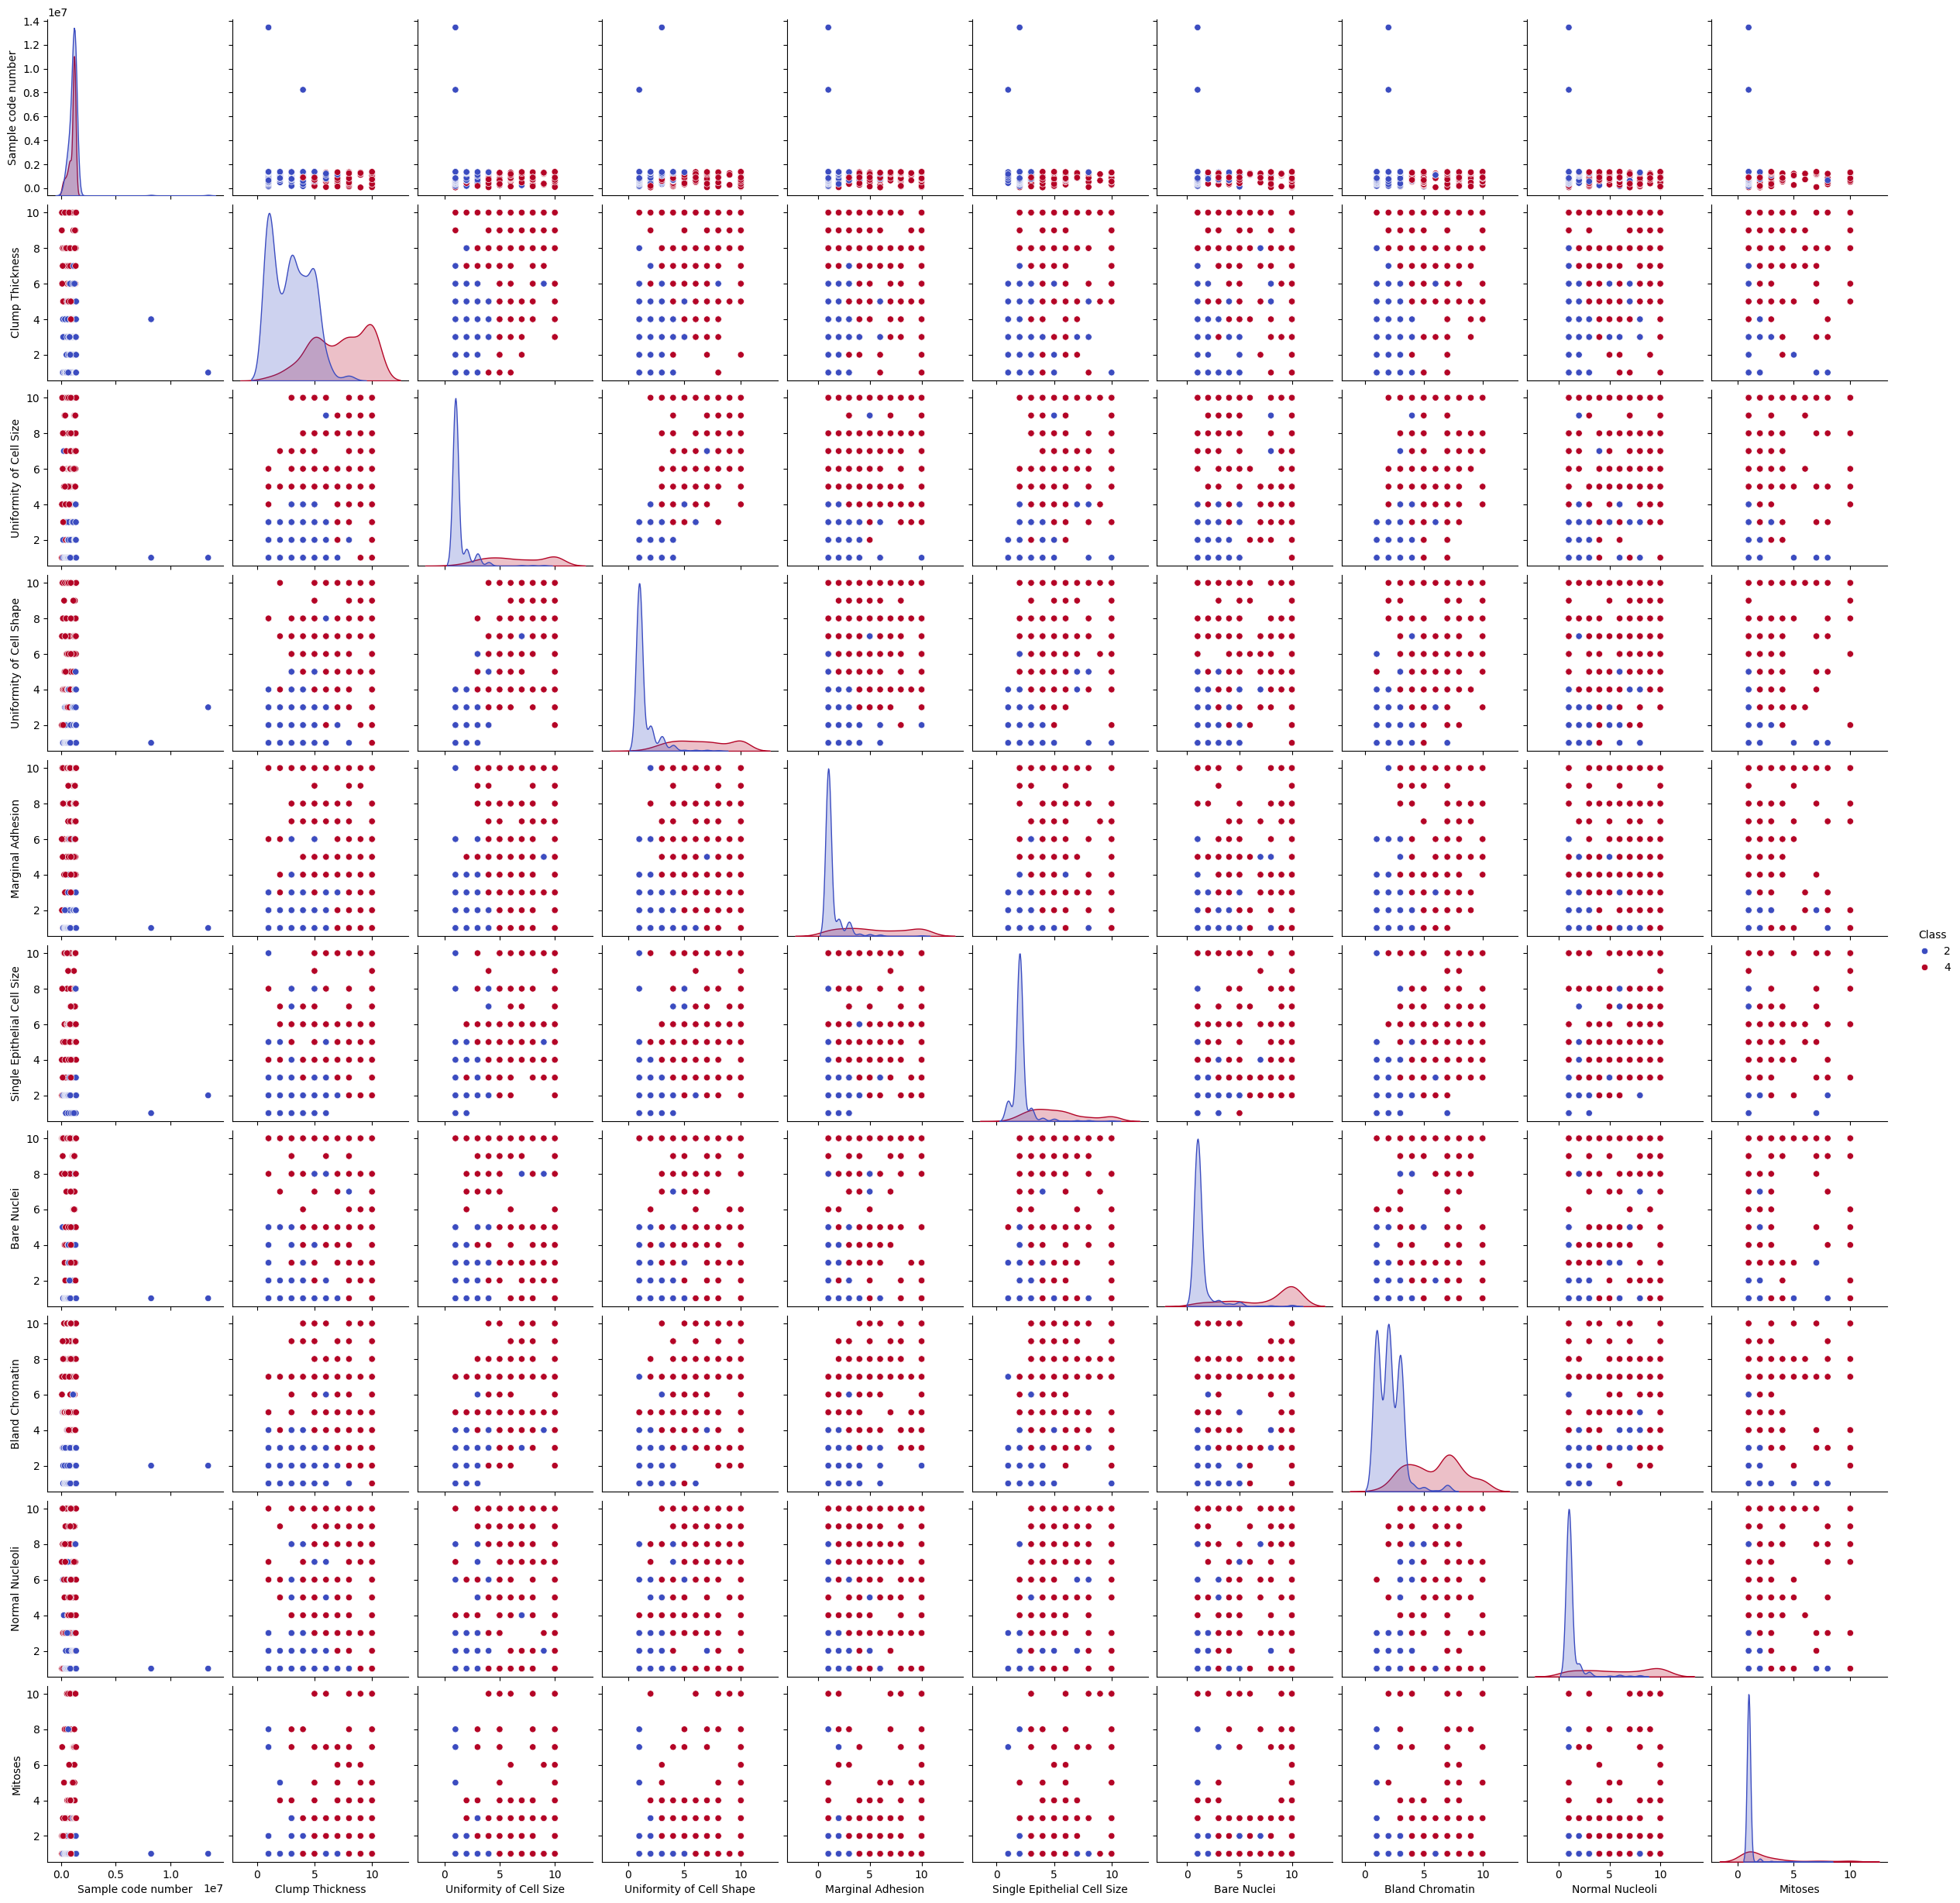

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

#pairplot ile veri dağılımını ve ilişkilerini göster
sns.pairplot(dataset, hue='Class', palette='coolwarm')
plt.show()

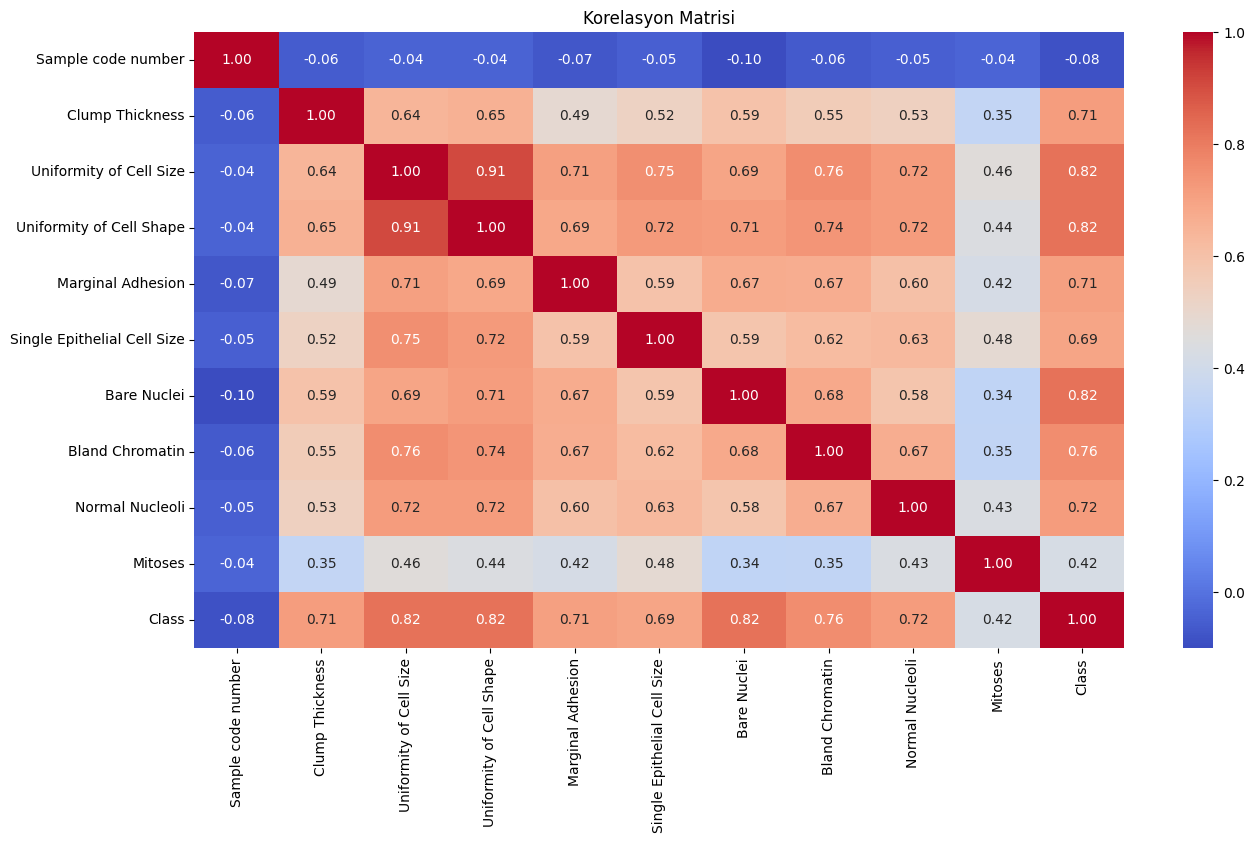

In [11]:
correlation_matrix = dataset.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasyon Matrisi')
plt.show()


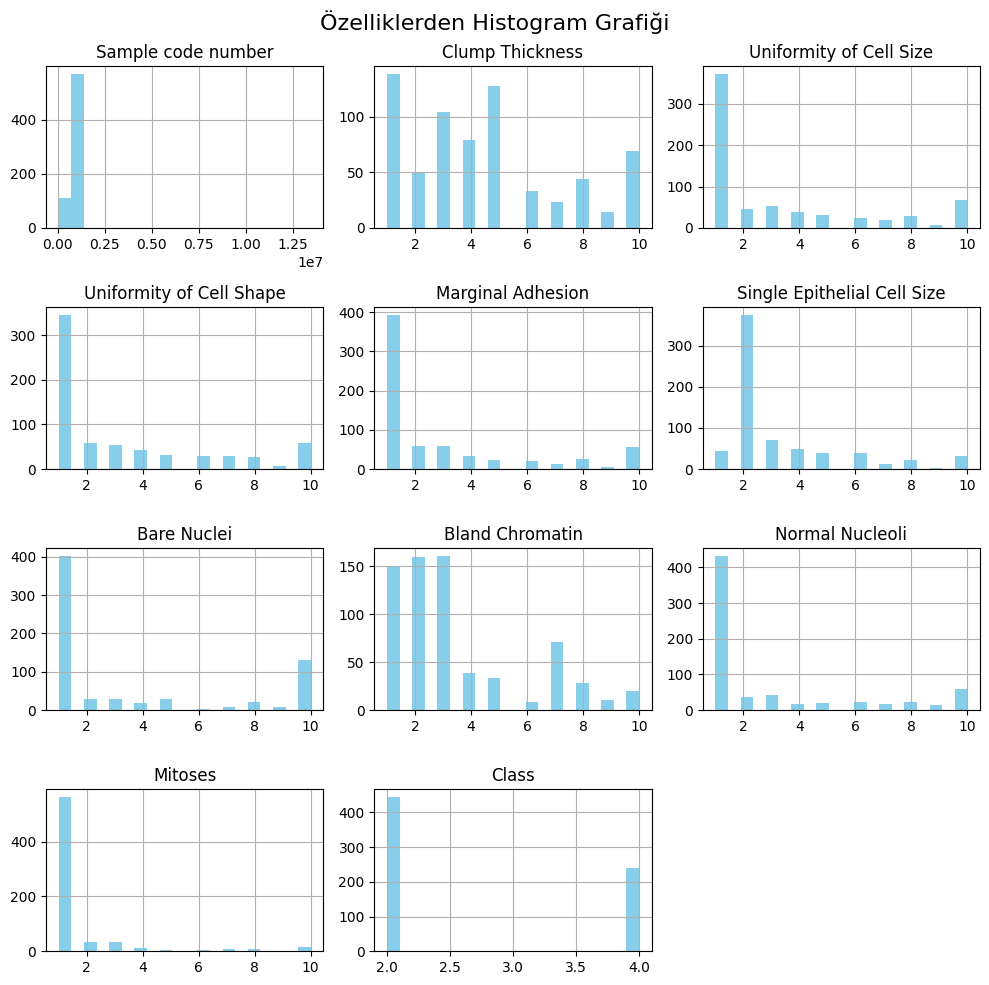

<ipython-input-12-7bb76ed6758b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=column, data=dataset, palette='Set2')
<ipython-input-12-7bb76ed6758b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=column, data=dataset, palette='Set2')
<ipython-input-12-7bb76ed6758b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=column, data=dataset, palette='Set2')
<ipython-input-12-7bb76ed6758b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

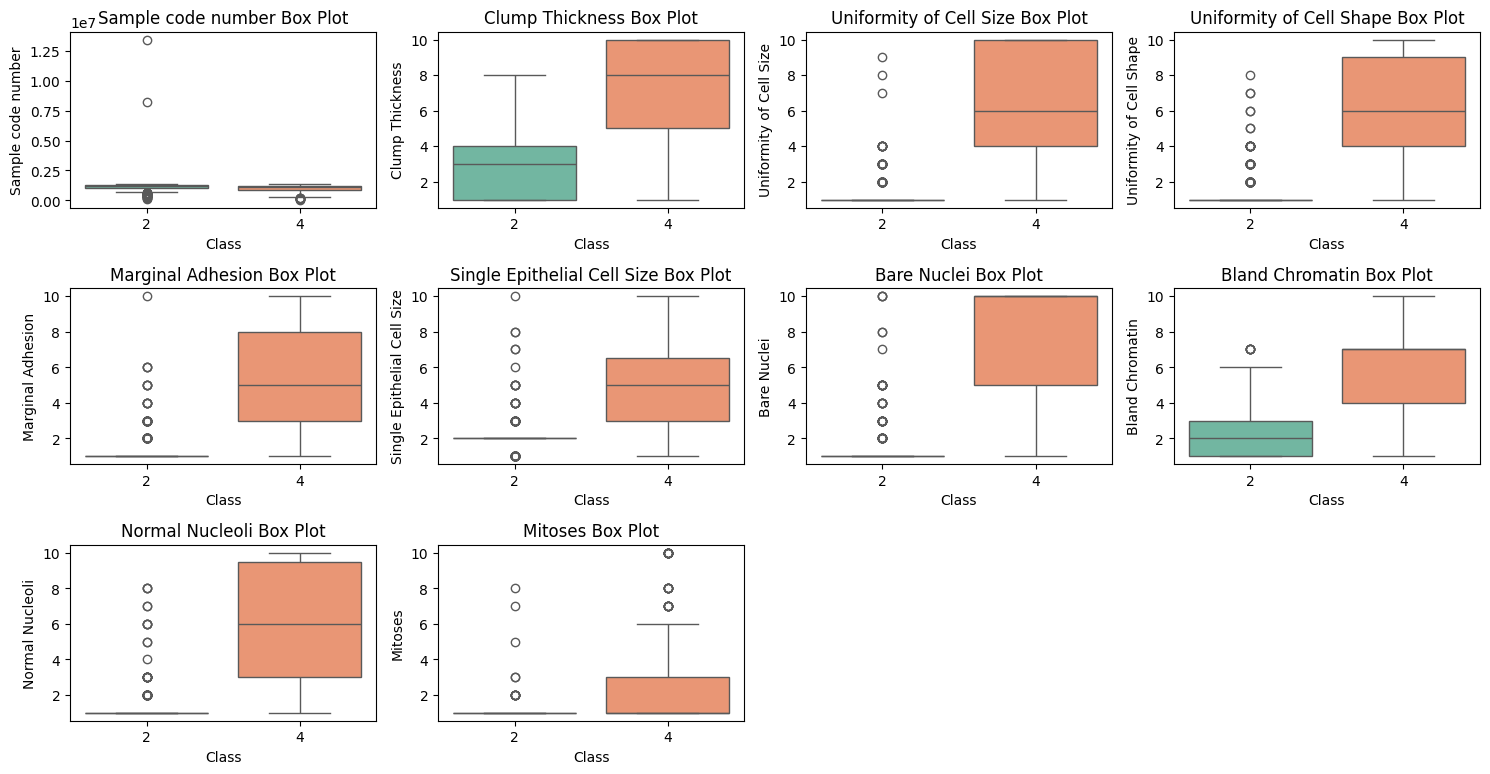

In [12]:
dataset.hist(figsize=(10, 10), bins = 20, color= 'skyblue')

plt.suptitle('Özelliklerden Histogram Grafiği', fontsize= 16)
plt.tight_layout()
plt.show()

#Sınıf Bazına Box plot Çiz
plt.figure(figsize=(15, 8))
for i, column in enumerate(dataset.columns[:-1]): # Son Sutun Hariç (Class)
    plt.subplot(3, 4, i+1)
    sns.boxplot(x='Class', y=column, data=dataset, palette='Set2')
    plt.title(f'{column} Box Plot')
plt.tight_layout()
plt.show()

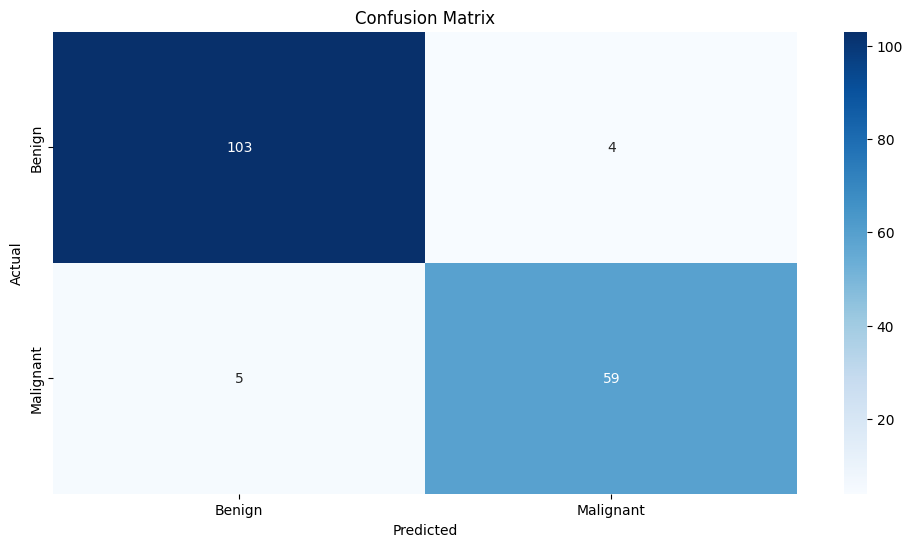

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'] )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()